### Пример кода

In [2]:
from sklearn.metrics import precision_score, f1_score

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split 

df_titanic = pd.read_csv('train.csv')
df_titanic_median_age = df_titanic.groupby('Sex')['Age'].median()
df_titanic.loc[df_titanic['Age'].isna(), 'Age'] = \
        df_titanic[df_titanic['Age'].isna()].apply(lambda row: df_titanic_median_age[row['Sex']], axis=1)

df_titanic.fillna('U', inplace=True)

df_titanic['Sex'] = df_titanic['Sex'].map({'male':0, 'female':1})
df_titanic['Embarked'] = df_titanic['Embarked'].map({'U':0, 'S':1, 'C':2, 'Q':3})

df_titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

y = df_titanic['Survived']
X = df_titanic.drop(columns=['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train.head()

(668, 7) (223, 7) (668,) (223,)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
407,2,0,3.0,1,1,18.7500,1
176,3,0,29.0,3,1,25.4667,1
816,3,1,23.0,0,0,7.9250,1
375,1,1,27.0,1,0,82.1708,2
151,1,1,22.0,1,0,66.6000,1


In [4]:
#Наименьший recall дала модель К ближайших соседей - 0.4891304347826087
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
recall = recall_score(y_test, knn_model.predict(X_test))
precision = precision_score(y_test, knn_model.predict(X_test))

print(f'Модель {knn_model}:')
print(f'Recall = {recall}')
print(f'Precision = {precision}')
print(f'F1 = {f1_score(y_test, knn_model.predict(X_test))}')

#Среднее арифметическое precision и recall немного больше, чем F1-мера 

Модель KNeighborsClassifier():
Recall = 0.4891304347826087
Precision = 0.6818181818181818
F1 = 0.5696202531645569


In [5]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [6]:
#Дообучим остальные классификаторы
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

nb_model = GaussianNB().fit(X_train, y_train)
dtc_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)
lr_model = LogisticRegression(random_state=17).fit(X_train, y_train)


In [7]:
print(f'Модель {knn_model}:')
print(classification_report(y_test, knn_model.predict(X_test)))
#print(precision_recall_fscore_support(y_test, knn_model.predict(X_test)))
print('\n\n')
print(f'Модель {nb_model}:')
print(classification_report(y_test, nb_model.predict(X_test)))
#print(precision_recall_fscore_support(y_test, nb_model.predict(X_test)))
print('\n\n')
print(f'Модель {dtc_model}:')
print(classification_report(y_test, dtc_model.predict(X_test)))
#print(precision_recall_fscore_support(y_test, dtc_model.predict(X_test)))
print('\n\n')
print(f'Модель {lr_model}:')
print(classification_report(y_test, lr_model.predict(X_test)))
#print(precision_recall_fscore_support(y_test, lr_model.predict(X_test)))

Модель KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223




Модель GaussianNB():
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223




Модель DecisionTreeClassifier(random_state=17):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       131
           1       0.78      0.72      0.75        92

    accuracy                           0.80       223
   macro avg       0.7

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
import warnings

warnings.simplefilter('ignore')

In [9]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
Cs = np.logspace(-1, 2, 500)
lrc = LogisticRegressionCV(Cs=Cs, cv=skf, random_state=17, scoring='roc_auc')
lrc.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.149399...
        72.73165113,  73.7454909 ,  74.77346305,  75.81576458,
        76.87259522,  77.9441575 ,  79.03065679,  80.13230128,
        81.24930211,  82.38187331,  83.53023195,  84.69459808,
        85.87519485,  87.07224849,  88.28598841,  89.51664721,
        90.76446073,  92.02966809,  93.31251175,  94.61323756,
        95.93209478,  97.26933615,  98.62521795, 100.        ]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     random_state=17

In [11]:
import matplotlib.pyplot as plt

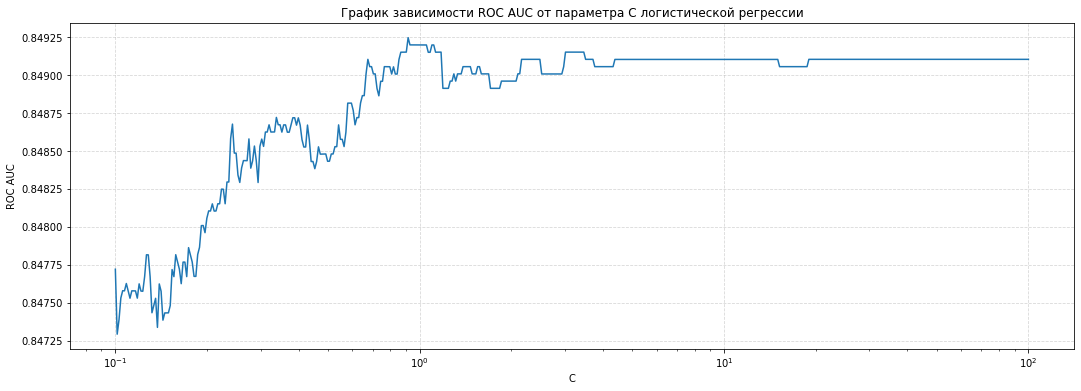

In [12]:
scores = lrc.scores_[1]
scores = scores.mean(axis=0)

plt.figure(figsize=(18, 6))

plt.plot(Cs, scores)
plt.xscale('log')
plt.grid(linestyle='--', alpha=0.5)

plt.title('График зависимости ROC AUC от параметра C логистической регрессии')
plt.xlabel('С')
plt.ylabel('ROC AUC')

plt.show()

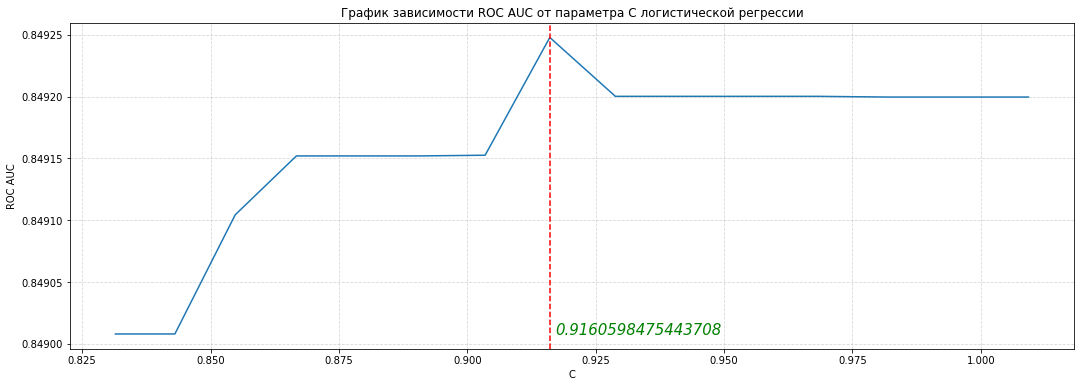

In [13]:
ind_max = scores.argmax()
scores_to_plot = scores[ind_max-7:ind_max+8]
Cs_to_plot = Cs[ind_max-7:ind_max+8]

plt.figure(figsize=(18, 6))

plt.plot(Cs_to_plot, scores_to_plot)
plt.grid(linestyle='--', alpha=0.5)

plt.axvline(Cs[ind_max], linestyle='--', color='red')
plt.title('График зависимости ROC AUC от параметра C логистической регрессии')
plt.xlabel('С')
plt.ylabel('ROC AUC')

plt.annotate(text=Cs[ind_max], xy=(Cs[ind_max], min(scores_to_plot)), xycoords ='data', 
                 xytext = (Cs[ind_max]+0.001, min(scores_to_plot)), color = 'green', fontsize=15, fontstyle='oblique')

plt.show()

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

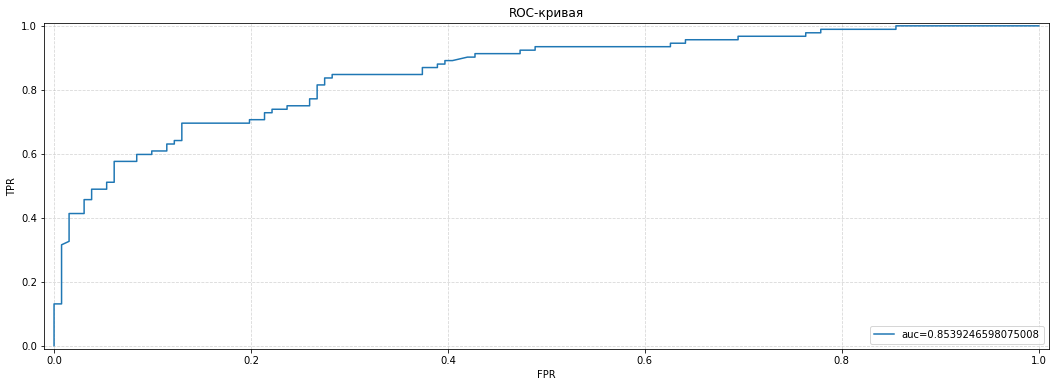

In [16]:
probas = lrc.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])

plt.figure(figsize=(18, 6))

plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')

plt.show()